In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the Dataset

In [257]:
data=pd.read_excel('iris_classification.xls')

Basic Details

In [258]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [259]:
data.shape

(150, 5)

In [260]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [261]:
data.describe(include='object')

,Classification
count,150
unique,3
top,Iris-setosa
freq,50


### Pre-Processing

Missing Value Handling

In [262]:
#Missing Values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

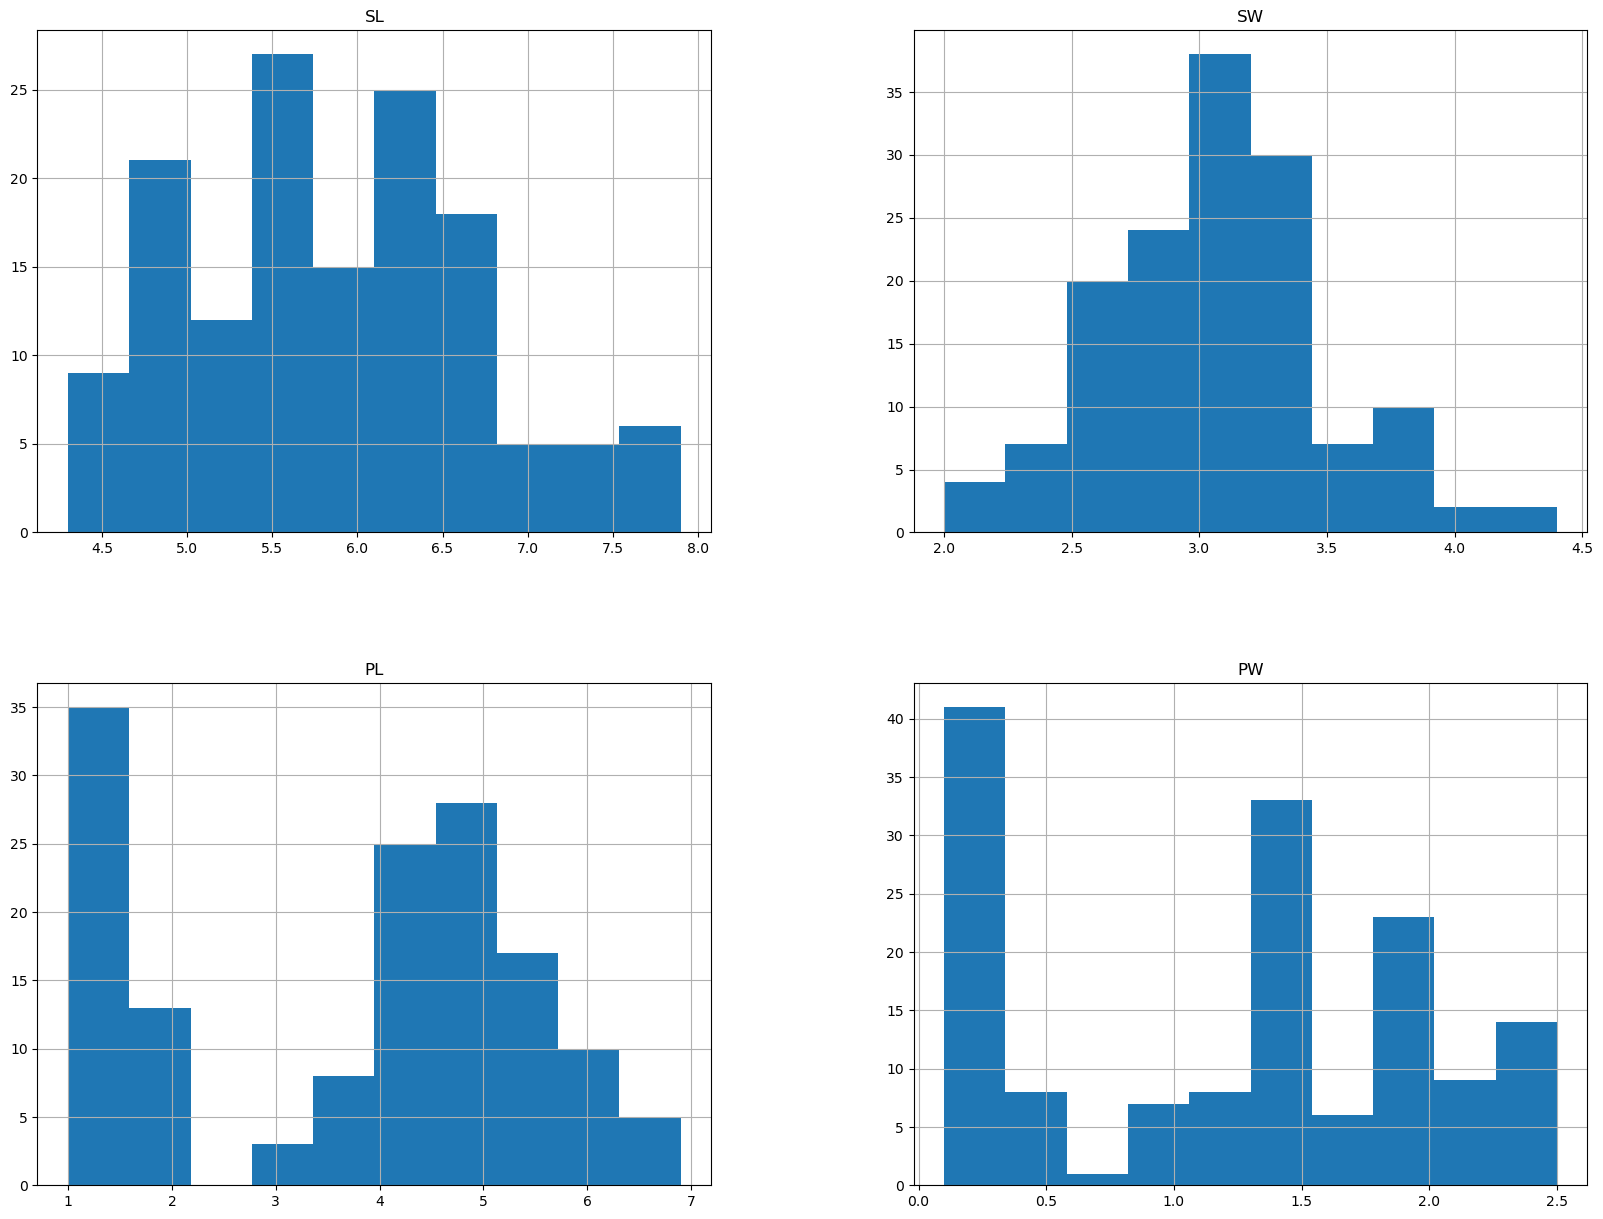

In [263]:
#Plottng the Distribution of Data
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [264]:
#since the data is not normally distributed but skewed, we must choose median to fill the missing values
for col in ['SL','SW','PL','PW']:
    data[col]=data[col].fillna(data[col].median())

In [265]:
#Verification
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Outlier Handling

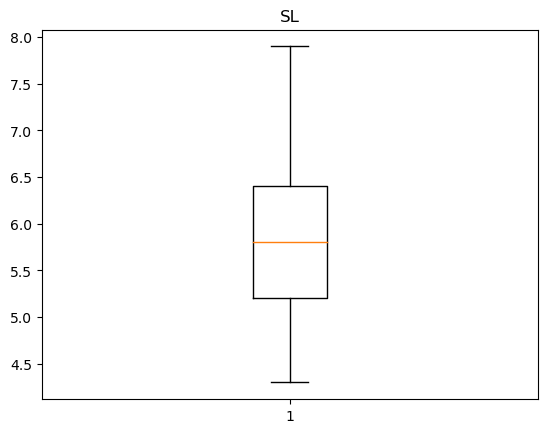

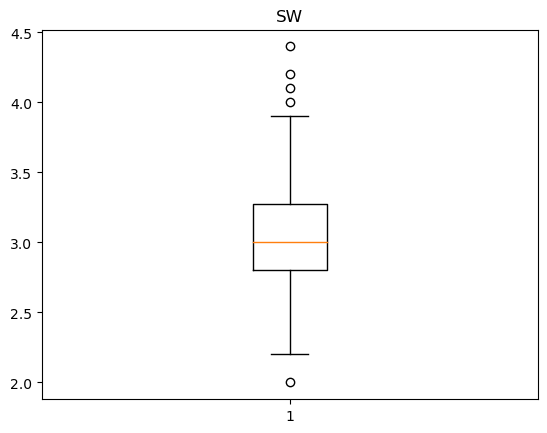

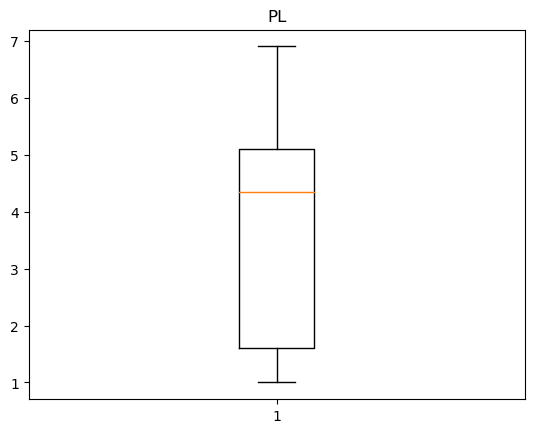

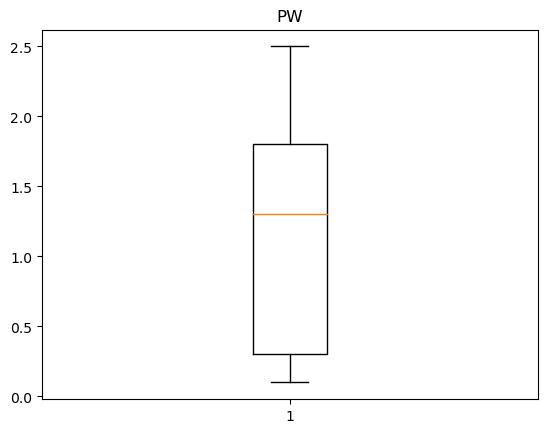

In [266]:
#Detection
for i in ['SL','SW','PL','PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [267]:
#There are outliers in SW column.
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9488\3334960739.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9488\3334960739.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9488\3334960739.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or '

In [268]:
IQR=Q3-Q1
print('IQR=',IQR)

IQR= 0.4500000000000002


In [269]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
print('Upper Limit=',up_lim)
print('Lower Limit=',low_lim)

Upper Limit= 3.9250000000000003
Lower Limit= 2.1249999999999996


In [270]:
outliers=[]
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [271]:
print('outliers=',outliers)

outliers= [4.0, 4.4, 4.1, 4.2, 2.0]


In [272]:
#Handling
data['SW'] = data['SW'].apply(lambda x: low_lim if x < low_lim else up_lim if x > up_lim else x)

#Lower outliers are replaced with lower limit  whereas upper outliers are replaced with upper limit.

Text(0.5, 1.0, 'SW')

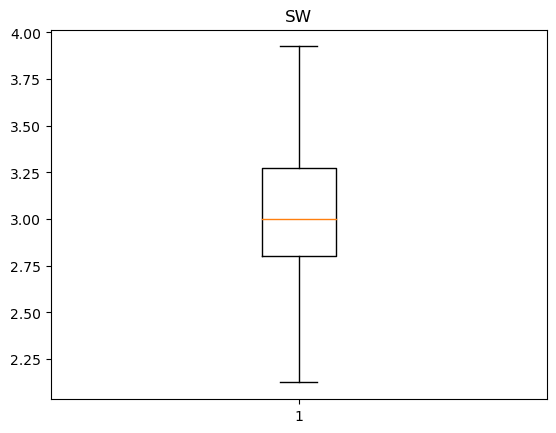

In [273]:
# verifying by plotting boxplot

plt.boxplot(data['SW'])
plt.title('SW')

### Encoding

In [274]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [275]:
data['Classification']=le.fit_transform(data['Classification'])
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Splitting into Features and Target

In [276]:
X=data.drop('Classification',axis=1)   #Features
y=data['Classification']               #Target

### Scaling

In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
std_scl=StandardScaler()

In [279]:
X=std_scl.fit_transform(X)

In [280]:
X=pd.DataFrame(X,columns=['SW','SL', 'PL', 'PW'])

In [281]:
#Verifying
X.head()

,SW,SL,PL,PW
0,-0.934811,1.141745,-1.380791,-1.312977
1,-1.182990,-0.103342,-1.380791,-1.312977
2,-0.066181,0.394692,-1.438808,-1.312977
3,-1.555260,0.145675,-1.322775,-1.312977
4,-1.058900,1.390762,-1.380791,-1.312977


Splitting into Training Set and Testing Set

In [282]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model Creation

Logistic Regression

In [283]:

from sklearn.linear_model import LogisticRegression
LoR=LogisticRegression()

In [284]:
LoR.fit(X_train,y_train)
y_pred_lor=LoR.predict(X_test)

In [285]:
#Evaluating
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [286]:
print('Accuracy=',accuracy_score(y_test,y_pred_lor))
print('Precision=',precision_score(y_test,y_pred_lor,average='micro'))
print('Recall=',recall_score(y_test,y_pred_lor,average='micro'))
print('F1 Score',f1_score(y_test,y_pred_lor,average='micro'))


Accuracy= 0.9666666666666667
Precision= 0.9666666666666667
Recall= 0.9666666666666667
F1 Score 0.9666666666666667


In [287]:
confusion_matrix(y_test,y_pred_lor)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

KNN

In [288]:
from sklearn.neighbors import KNeighborsClassifier
metric=[]
neighbours=np.arange(3,12)  

for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

In [289]:
metric

[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

Text(0, 0.5, 'Accuracy')

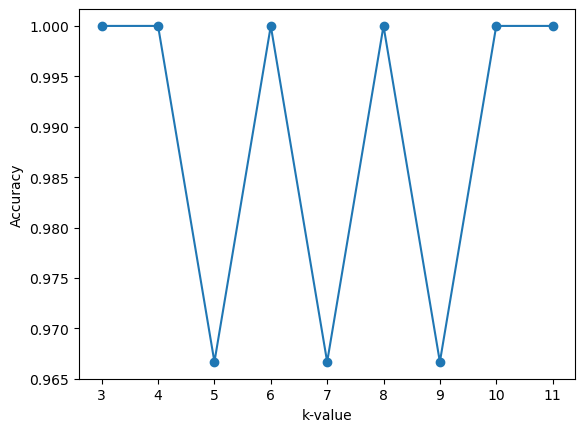

In [290]:
plt.plot(neighbours,metric,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')

In [291]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

In [292]:
#Evaluation
print('Accuracy=',accuracy_score(y_test,y_pred_knn))
print('Precision=',precision_score(y_test,y_pred_knn,average='micro'))
print('Recall=',recall_score(y_test,y_pred_knn,average='micro'))
print('F1 Score',f1_score(y_test,y_pred_knn,average='micro'))



Accuracy= 1.0
Precision= 1.0
Recall= 1.0
F1 Score 1.0


In [293]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

 Model created by KNN is better than that of Logistic Regression. It is clear from the accuracy level of both models; Logistic Regression:0.966 & KNN:1

### More Models

SVM

In [294]:
#Creating SVM Model
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [295]:
y_pred_svm=svmclf.predict(X_test)

In [297]:
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('Precision=',precision_score(y_test,y_pred_svm,average='micro'))
print('Recall=',recall_score(y_test,y_pred_svm,average='micro'))
print('F1 Score',f1_score(y_test,y_pred_svm,average='micro'))

Accuracy= 0.9666666666666667
Precision= 0.9666666666666667
Recall= 0.9666666666666667
F1 Score 0.9666666666666667


In [298]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Decision Tree

In [299]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [300]:
print('Accuracy=',accuracy_score(y_test,y_pred_dt))
print('Precision=',precision_score(y_test,y_pred_dt,average='micro'))
print('Recall=',recall_score(y_test,y_pred_dt,average='micro'))
print('F1 Score',f1_score(y_test,y_pred_dt,average='micro'))

Accuracy= 1.0
Precision= 1.0
Recall= 1.0
F1 Score 1.0


In [301]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Random Forest

In [302]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [303]:
y_pred_rf=rf.predict(X_test)

In [304]:
print('Accuracy=',accuracy_score(y_test,y_pred_rf))
print('Precision=',precision_score(y_test,y_pred_rf,average='micro'))
print('Recall=',recall_score(y_test,y_pred_rf,average='micro'))
print('F1 Score',f1_score(y_test,y_pred_rf,average='micro'))

Accuracy= 1.0
Precision= 1.0
Recall= 1.0
F1 Score 1.0


In [305]:
print(confusion_matrix(y_test,y_pred_rf))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
